In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

In [67]:
import warnings;
warnings.filterwarnings('ignore');

The filename is : data_11_5day.csv


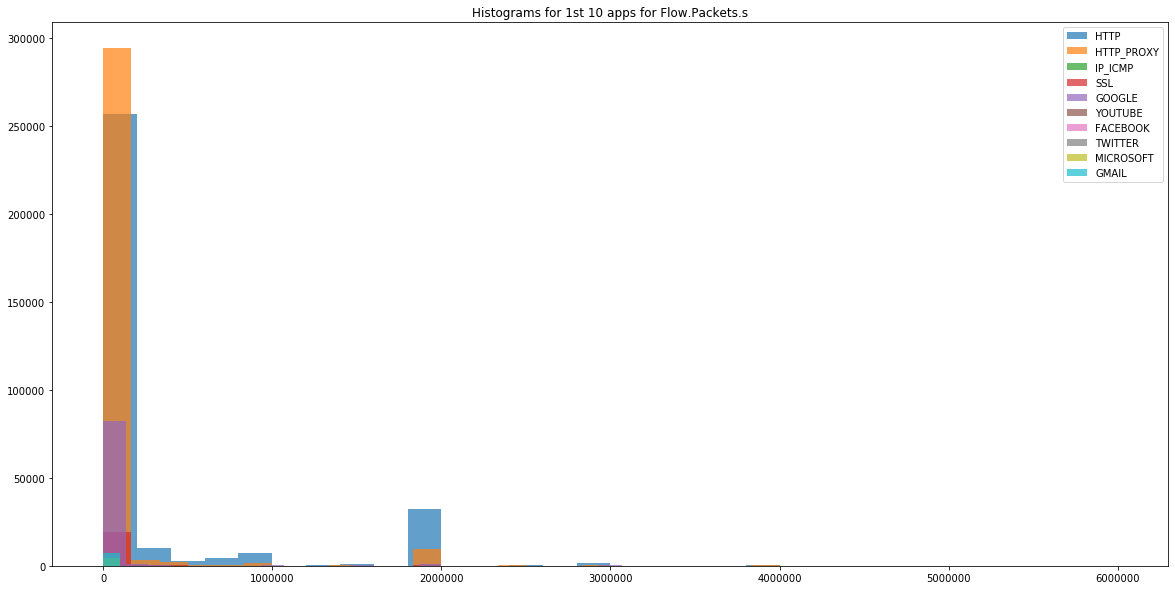

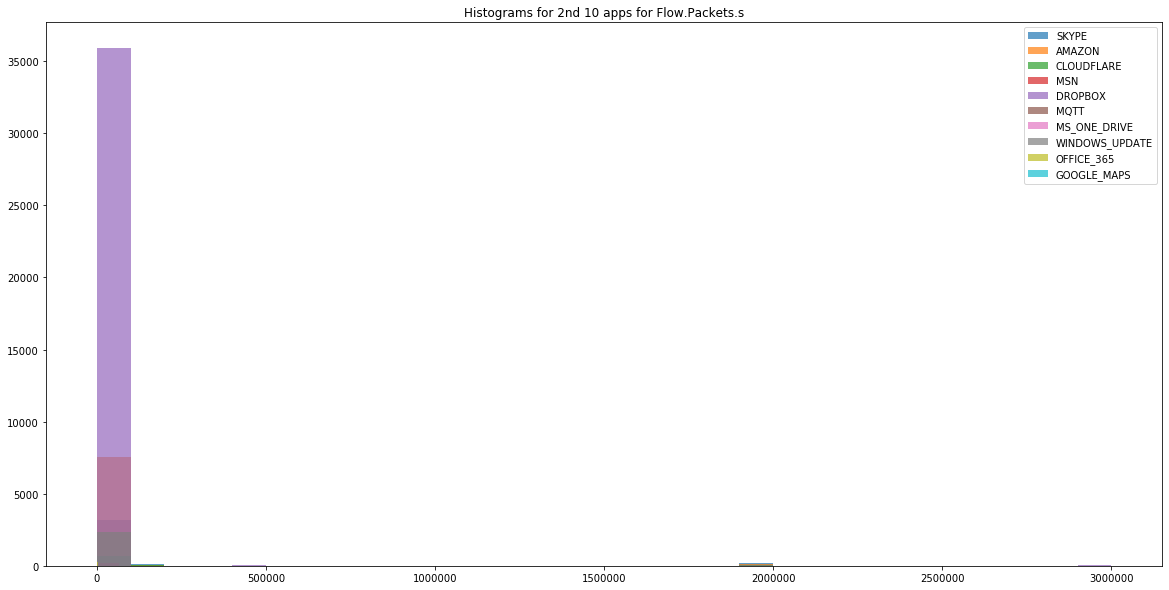

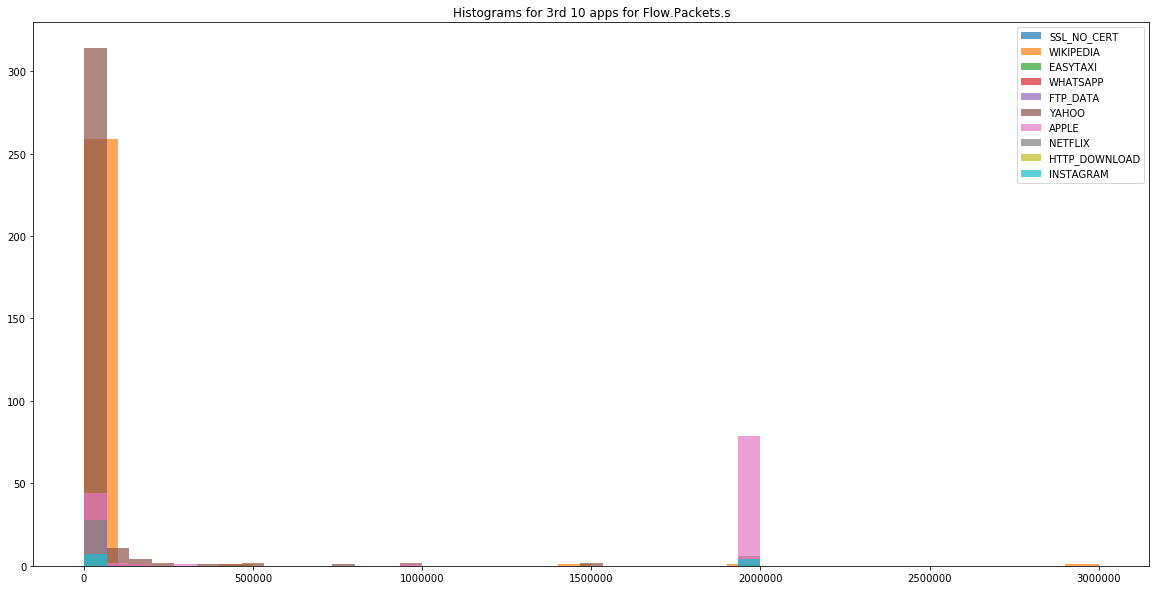

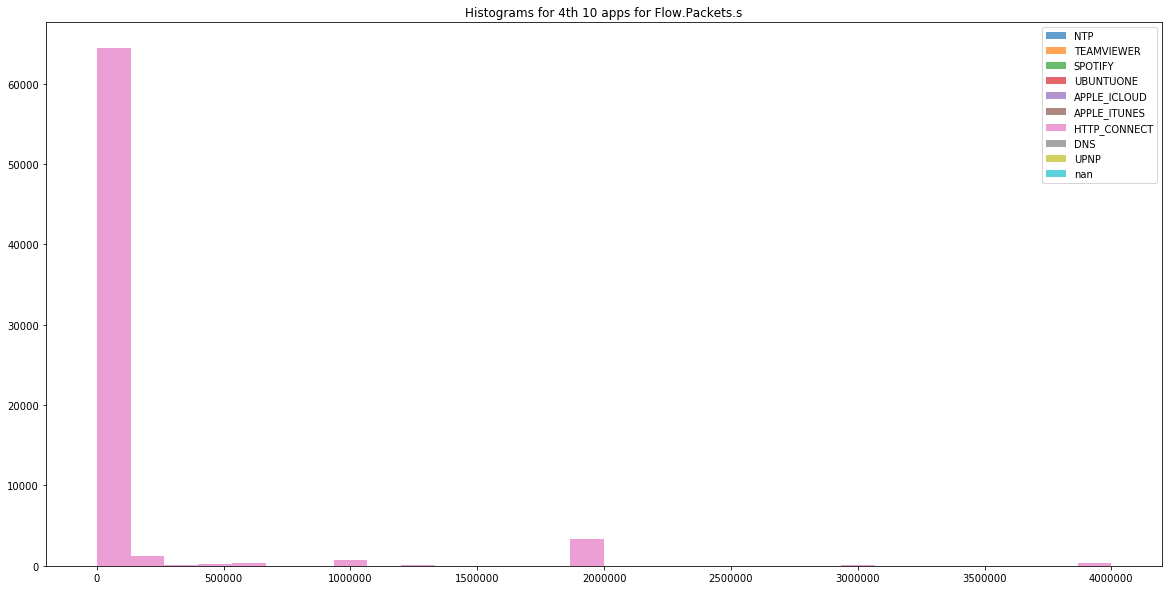

No handles with labels found to put in legend.


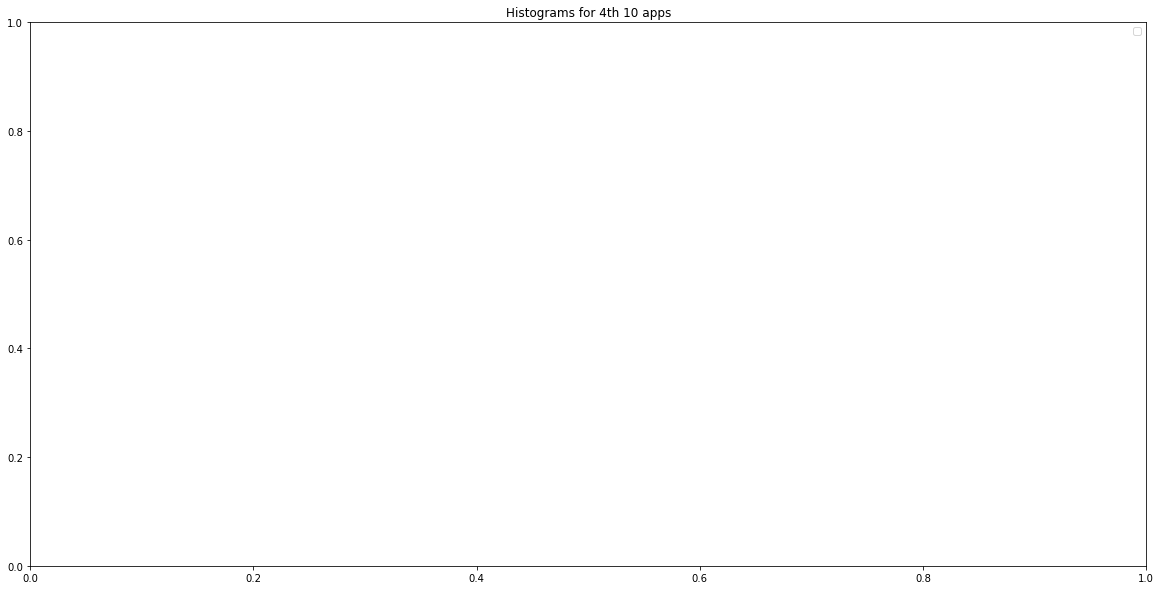

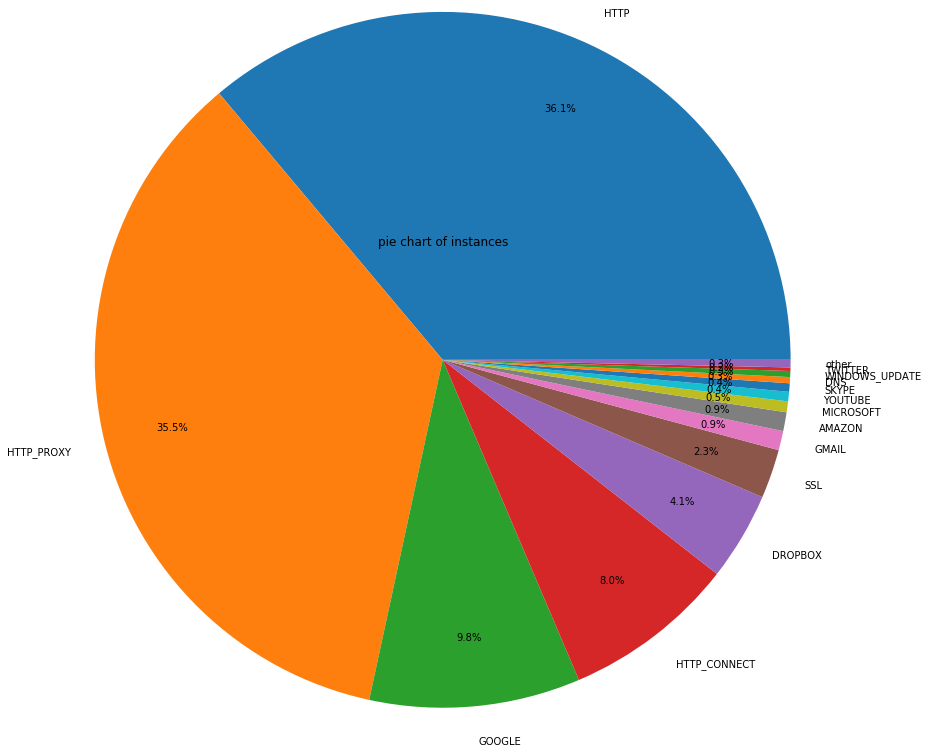

The filename is : data_15_5day.csv


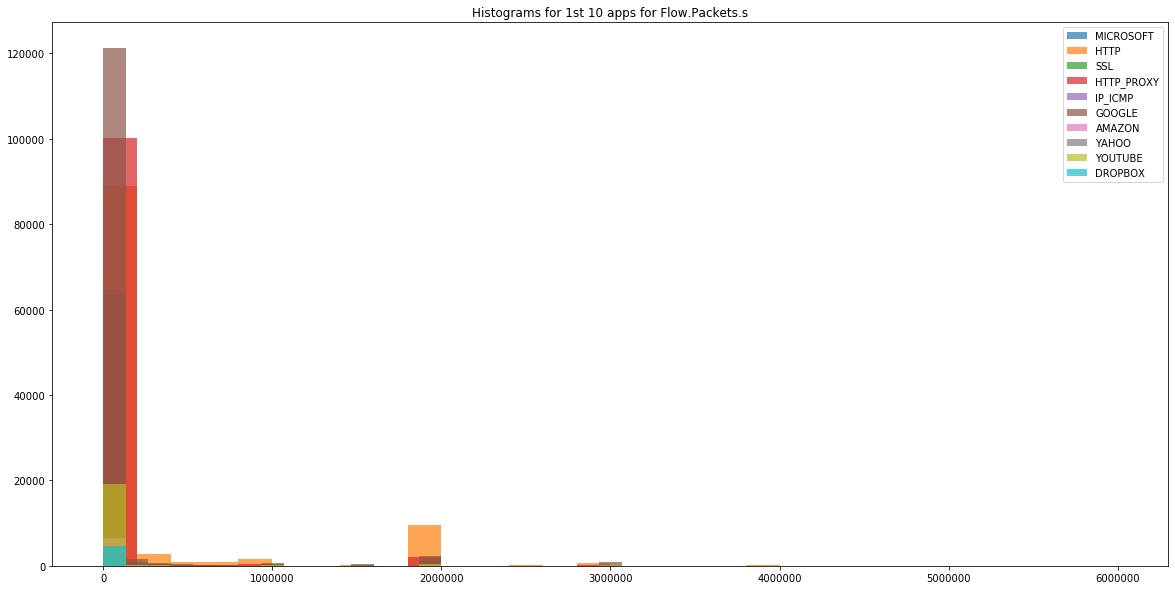

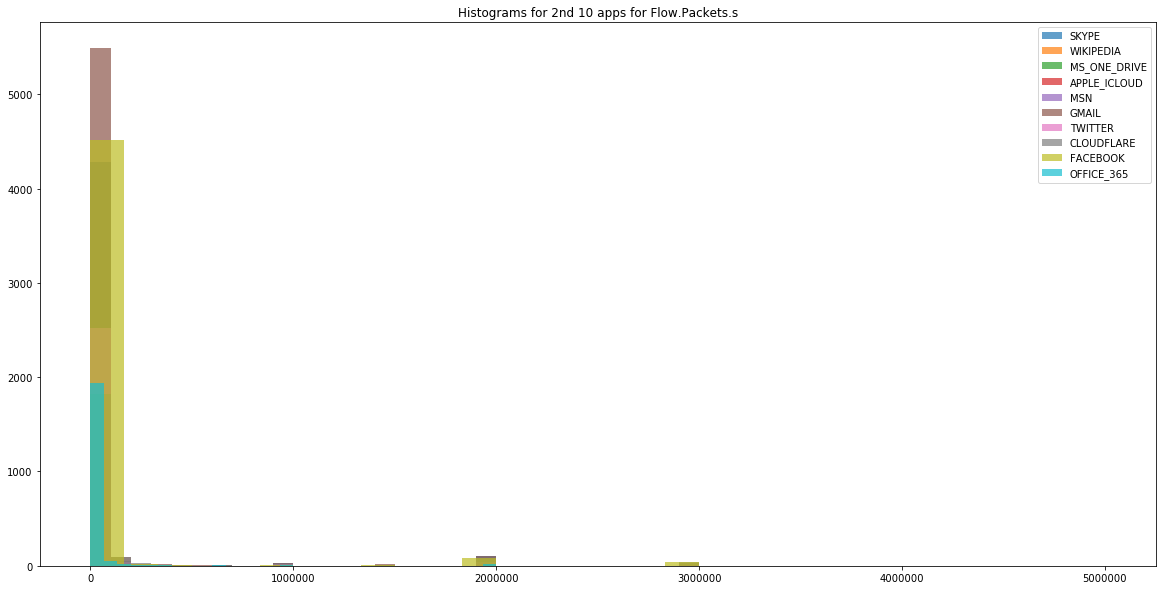

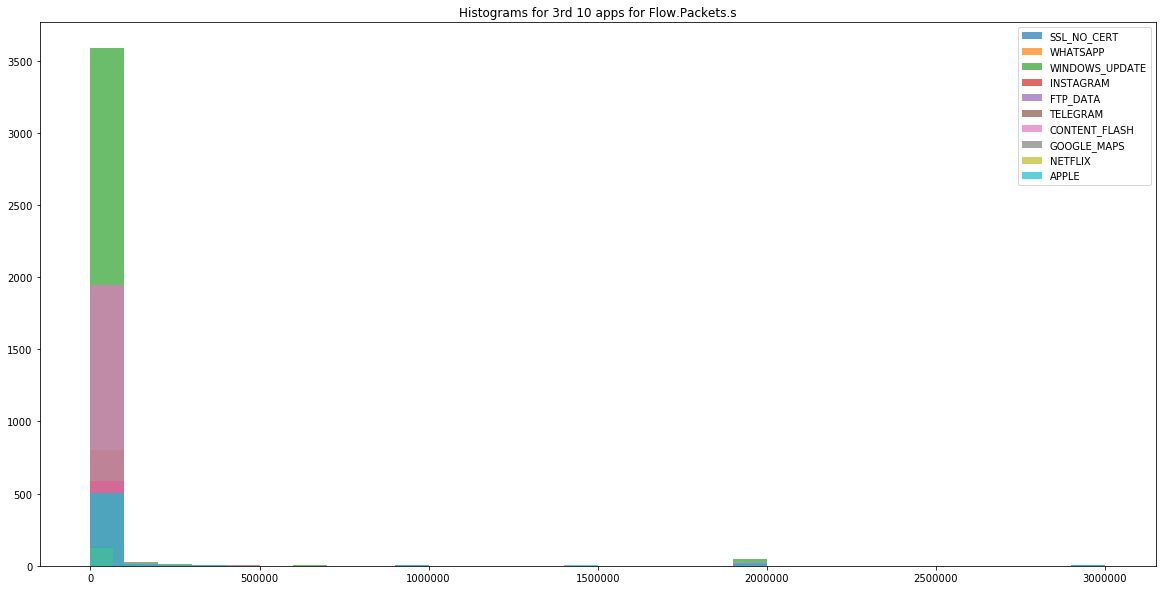

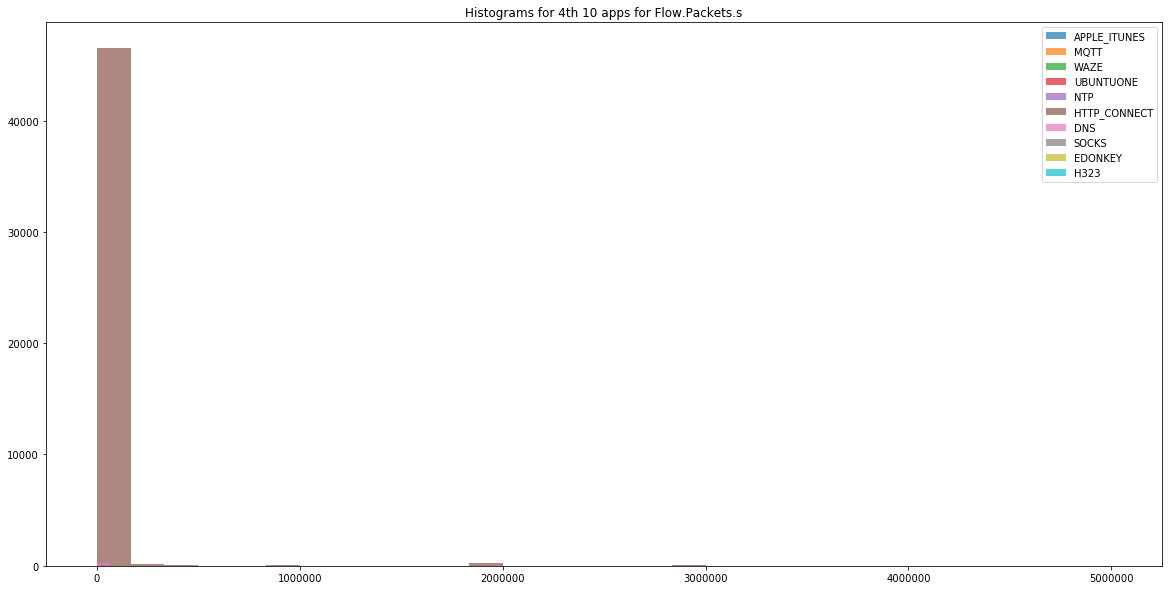

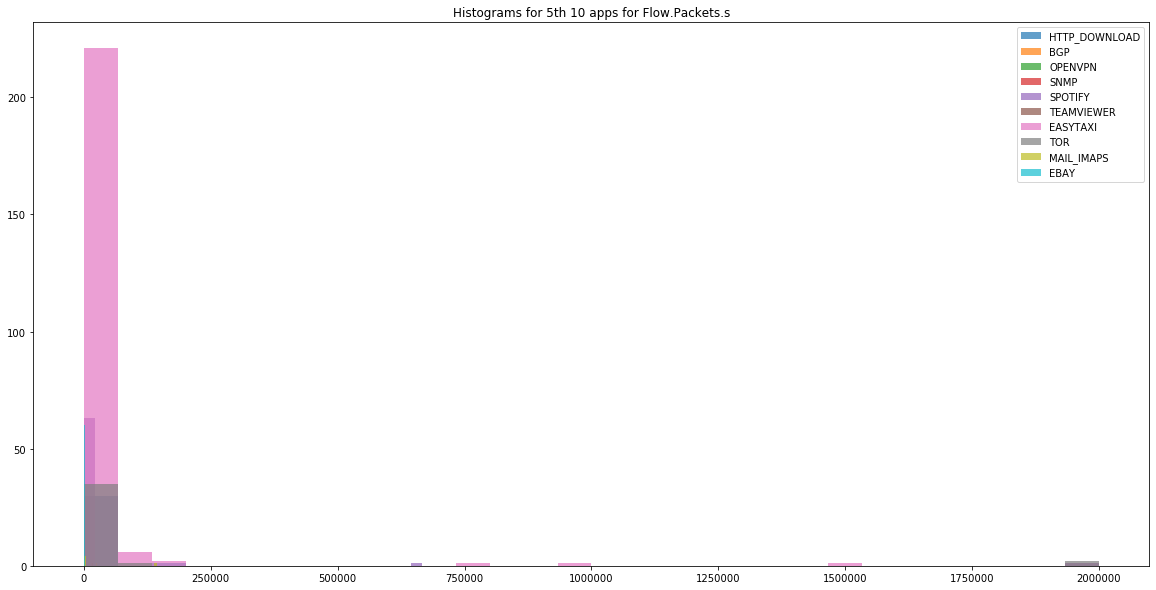

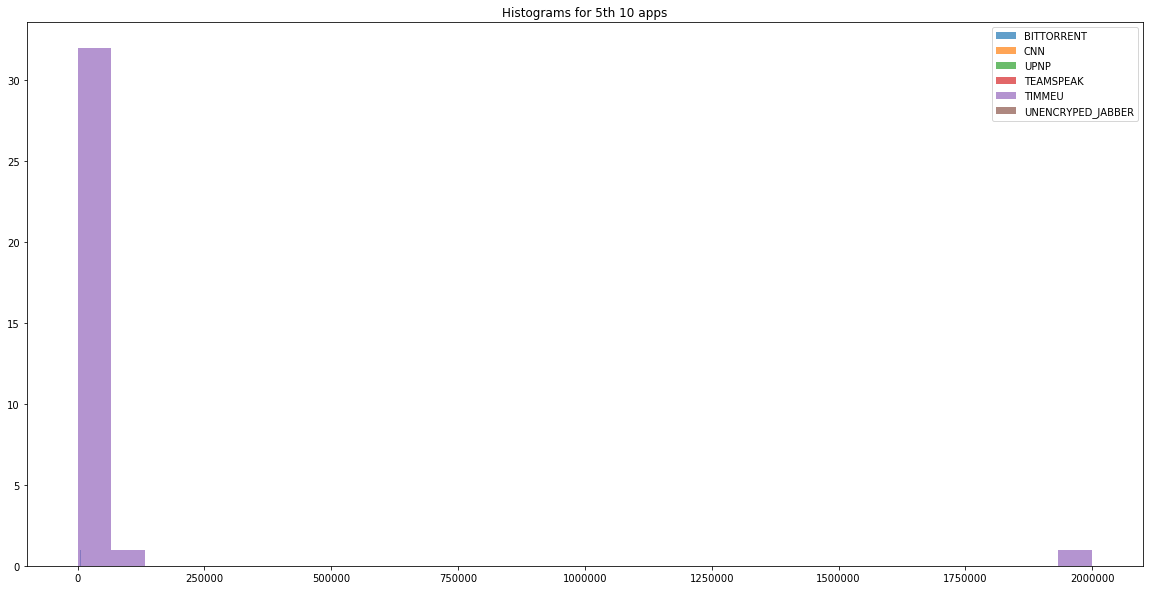

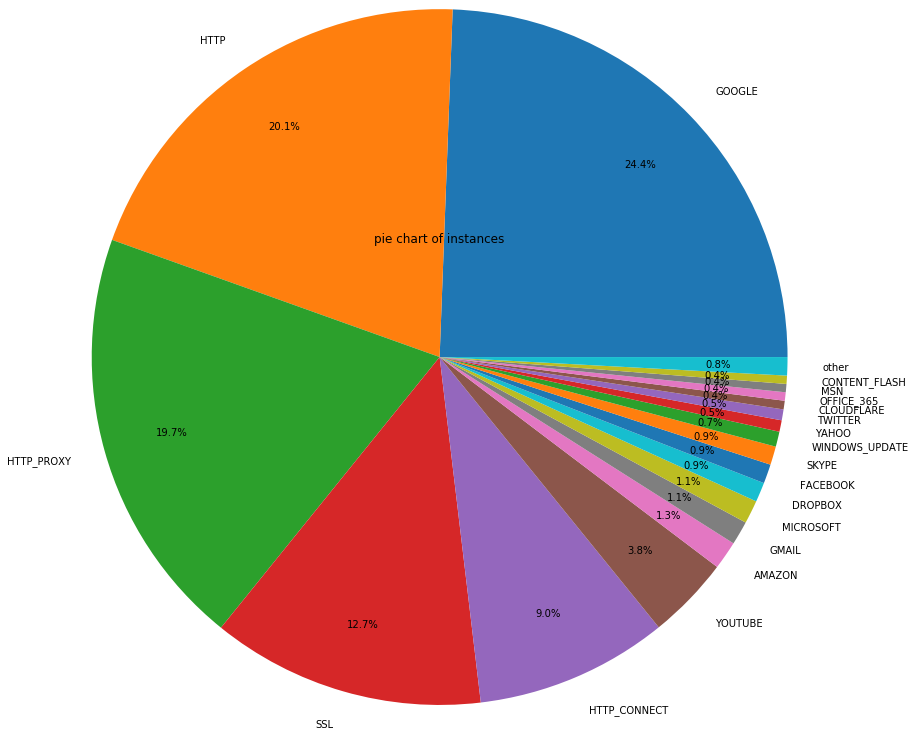

The filename is : data_26day.csv


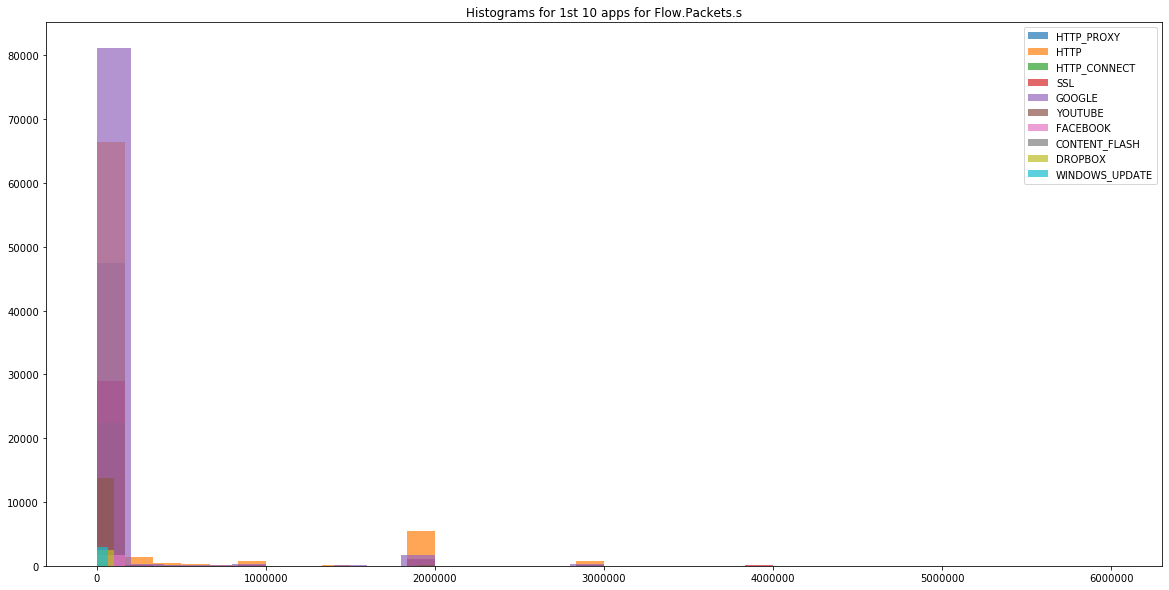

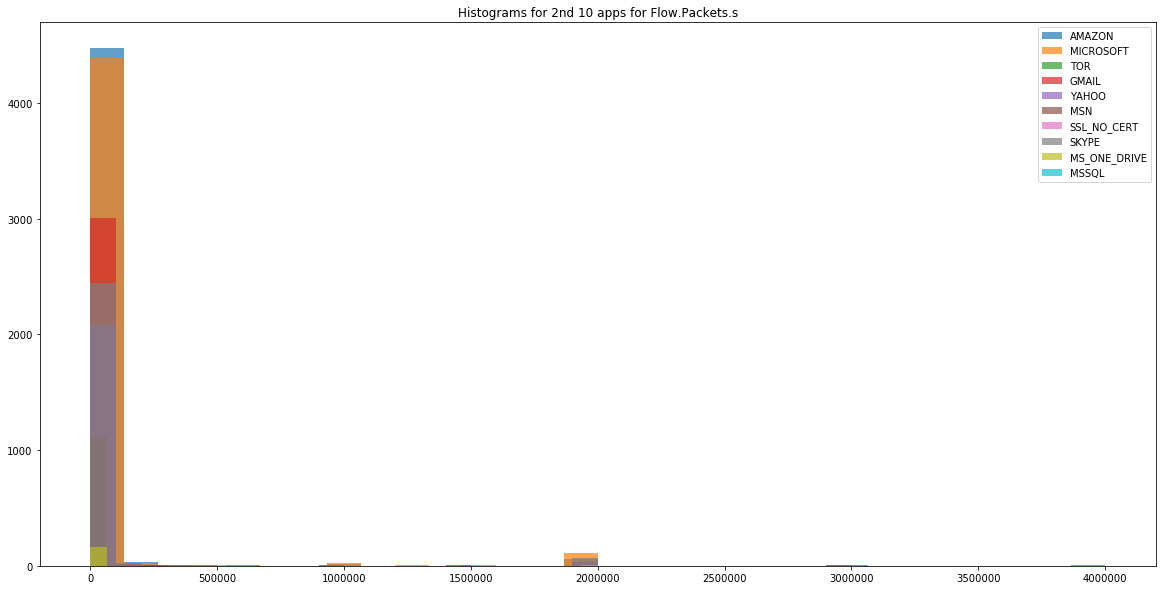

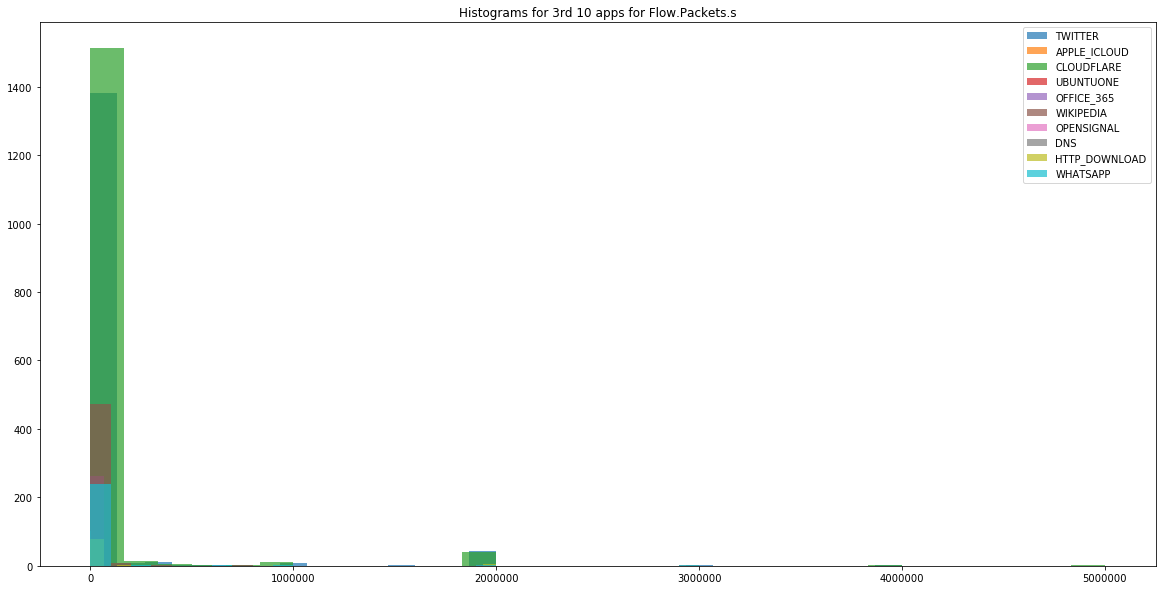

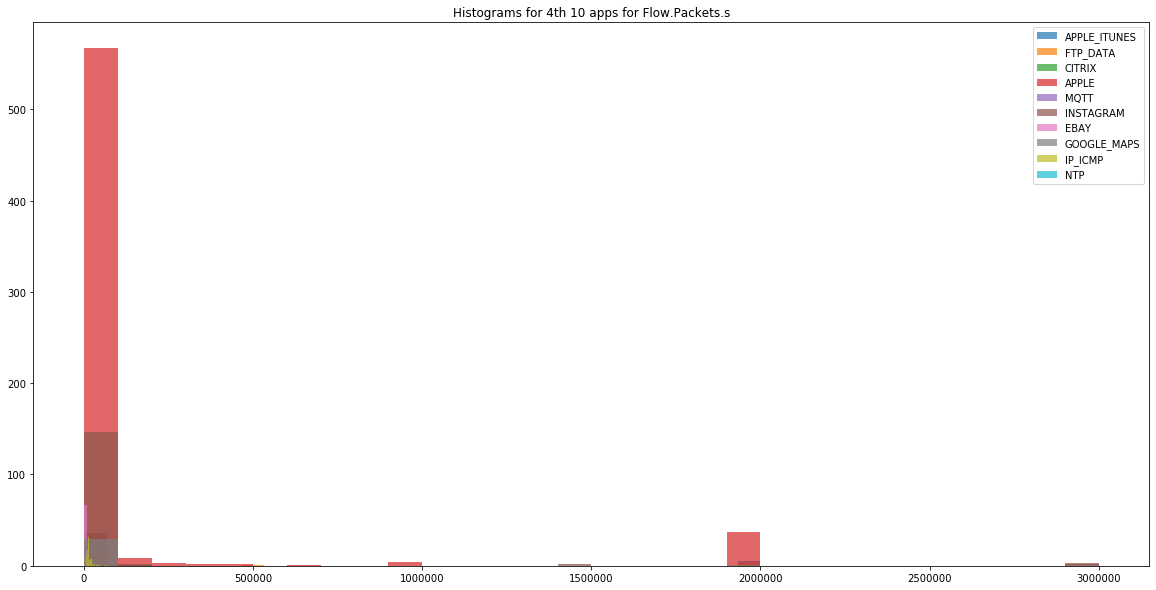

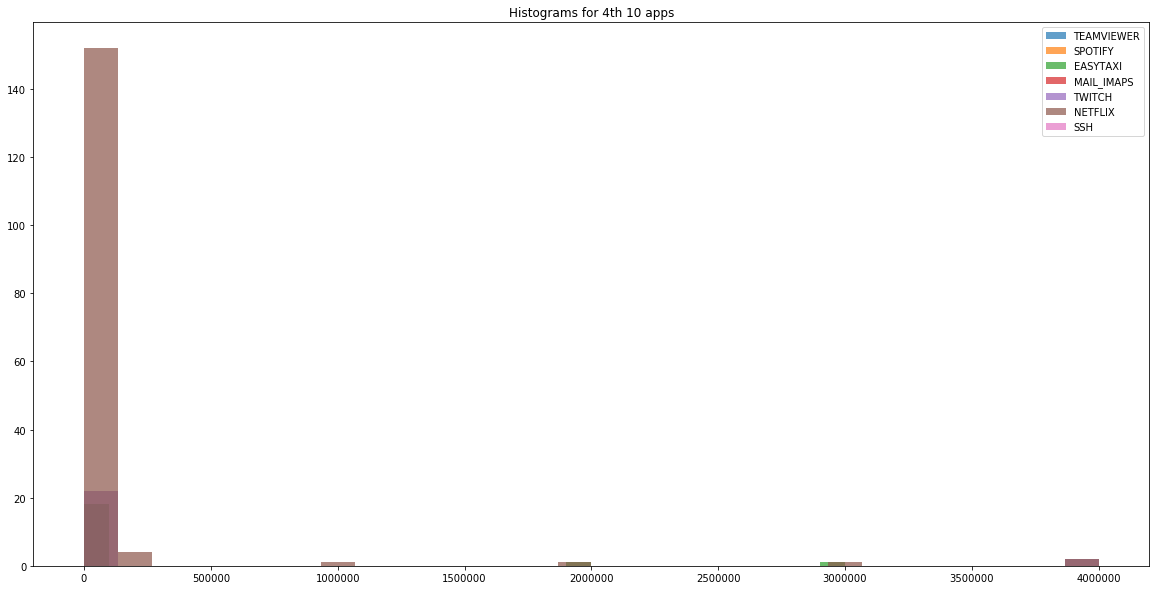

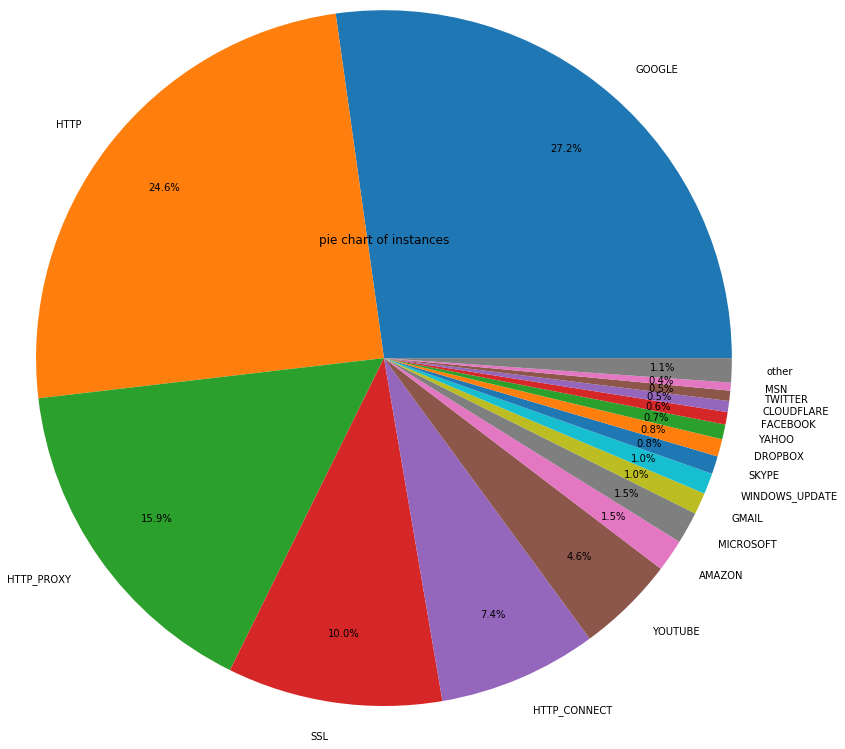

The filename is : data_27day.csv


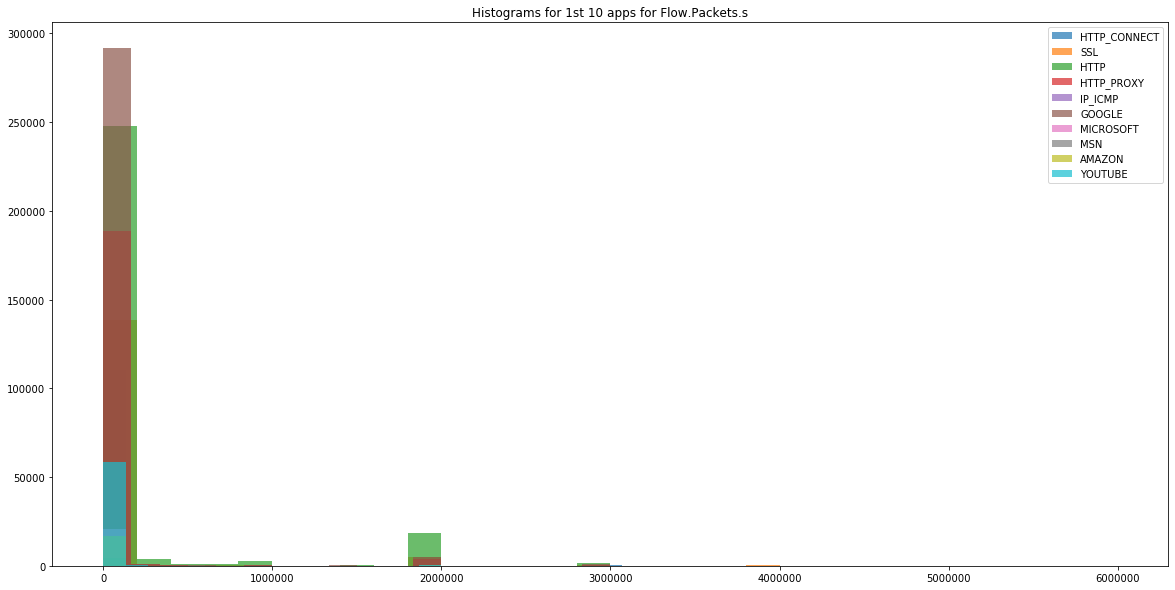

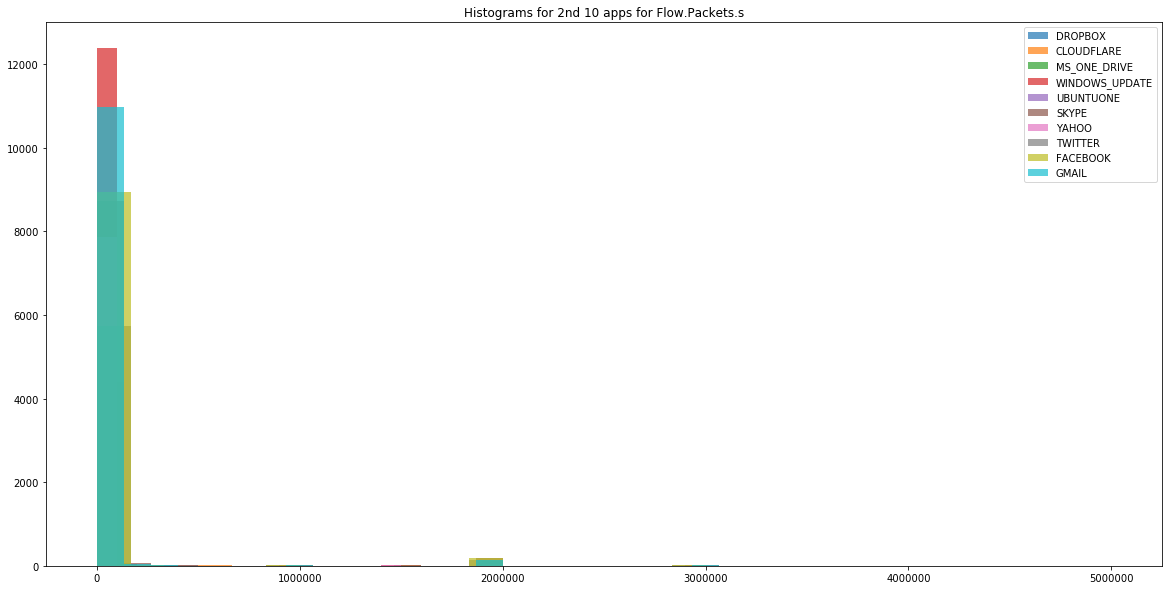

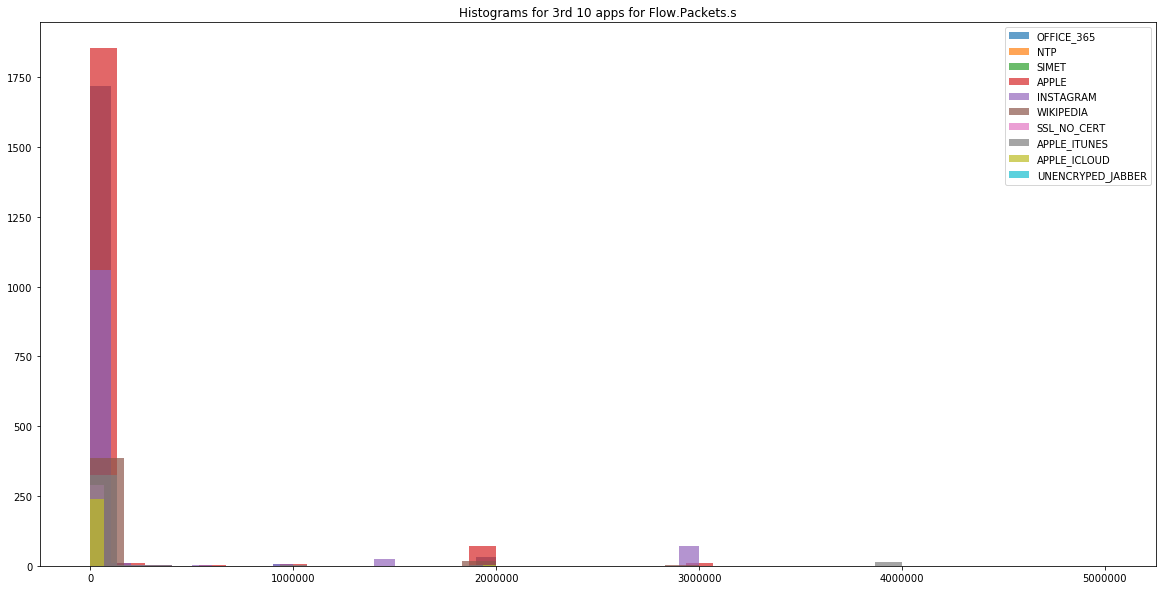

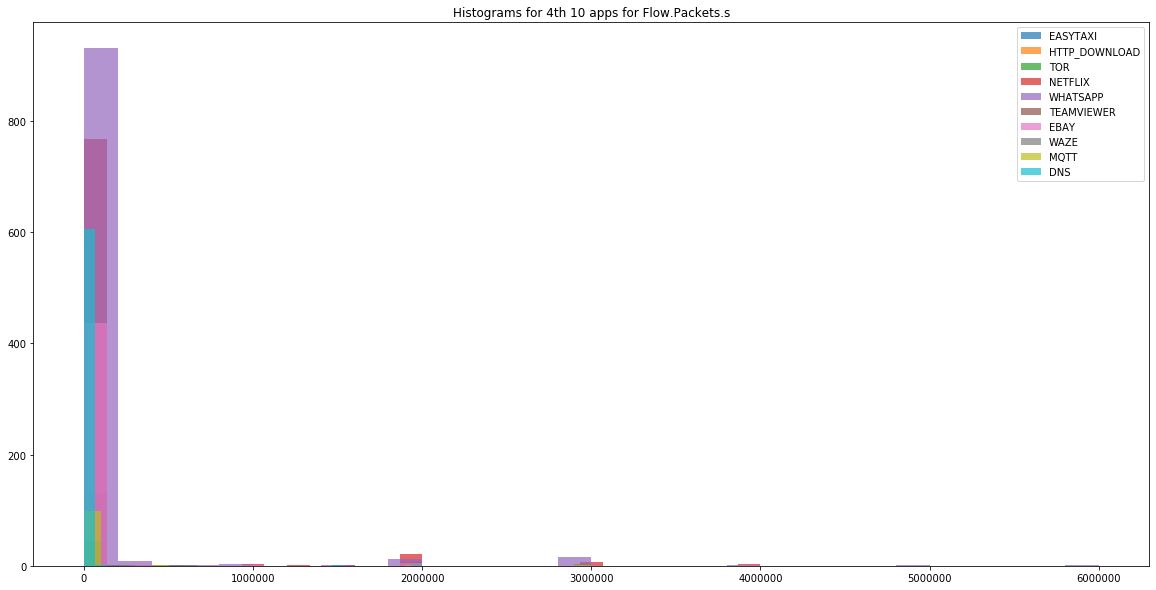

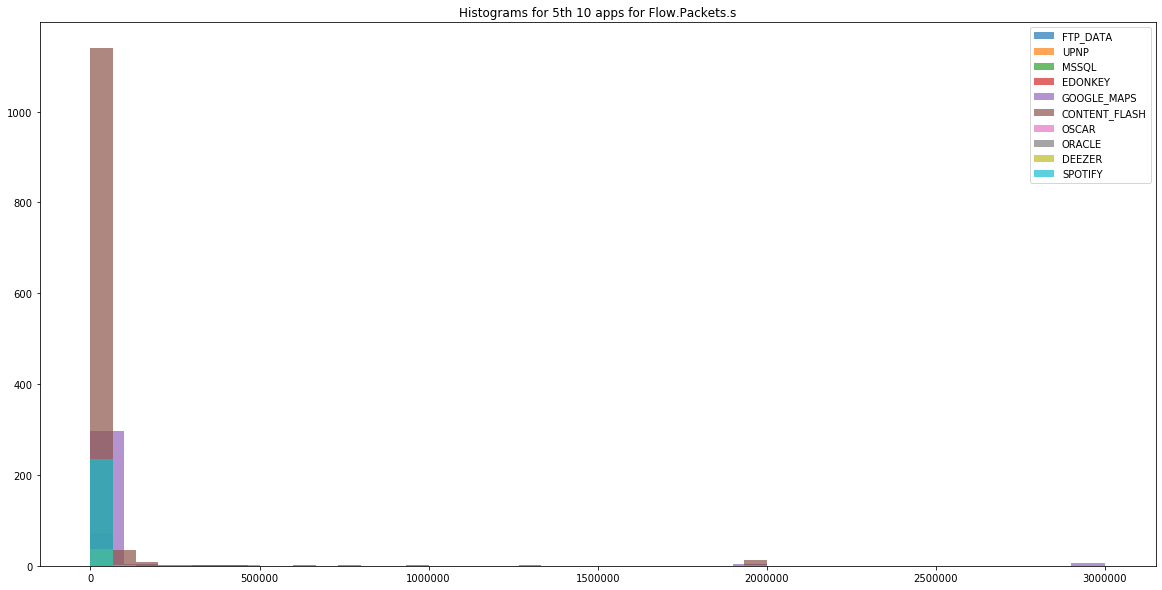

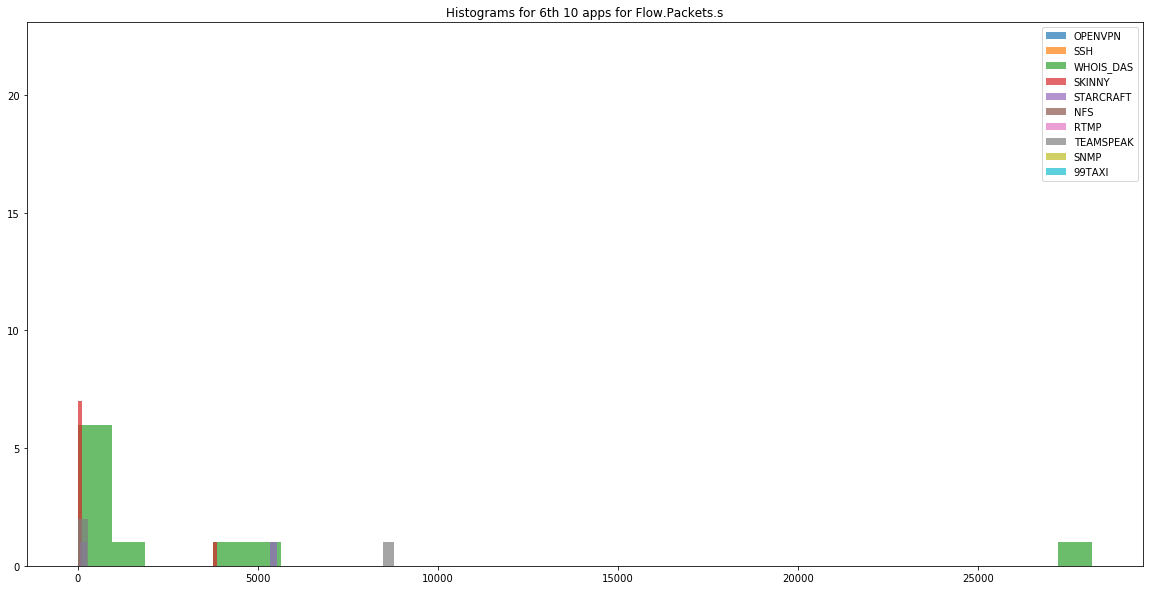

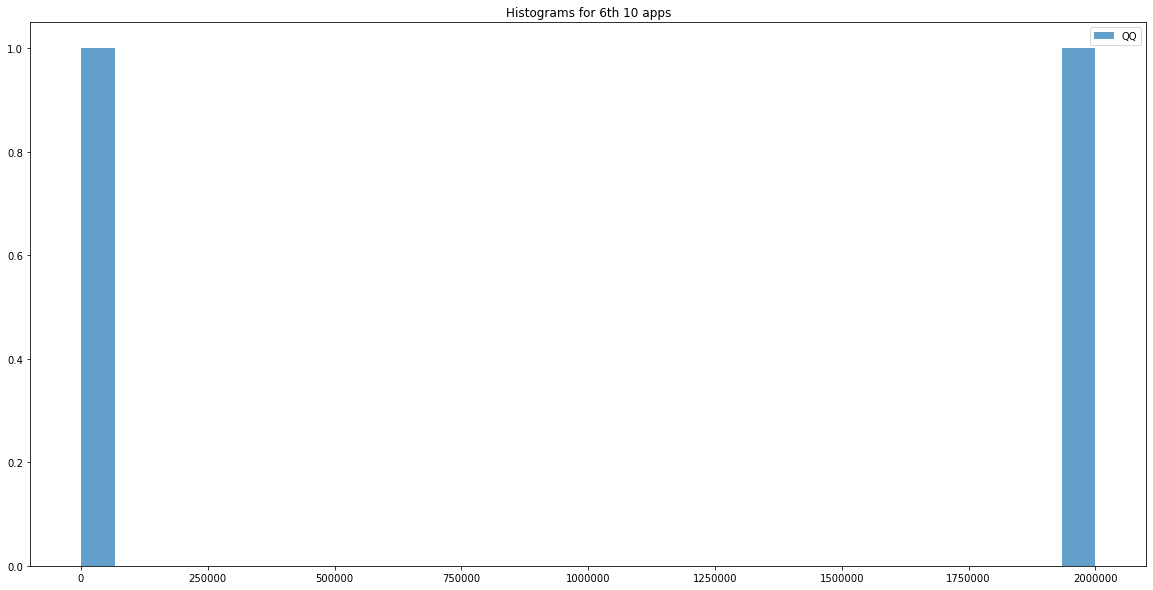

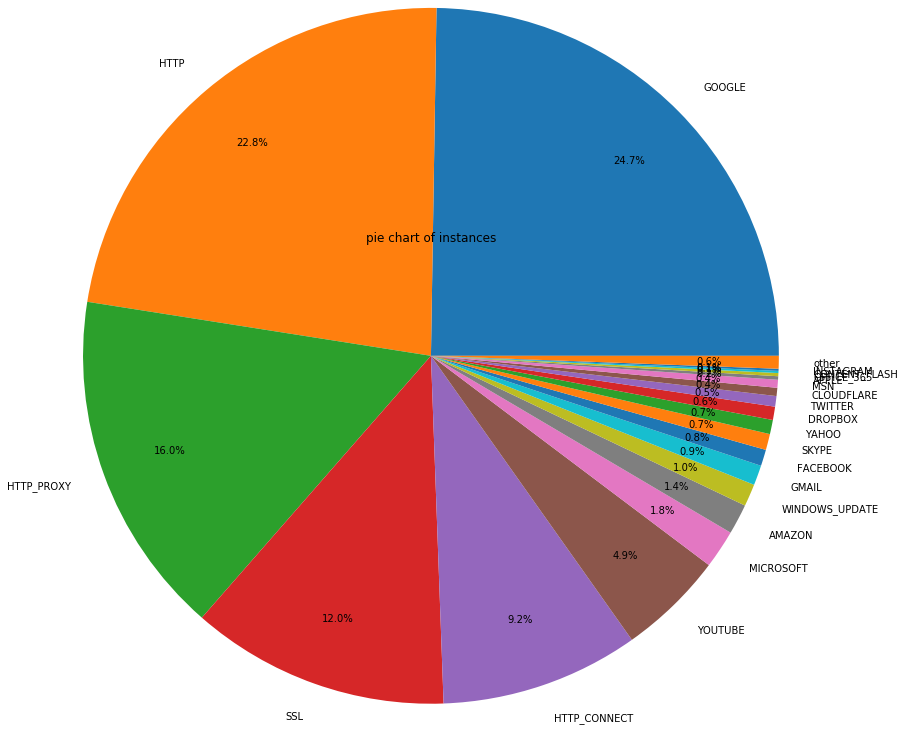

The filename is : data_28day.csv


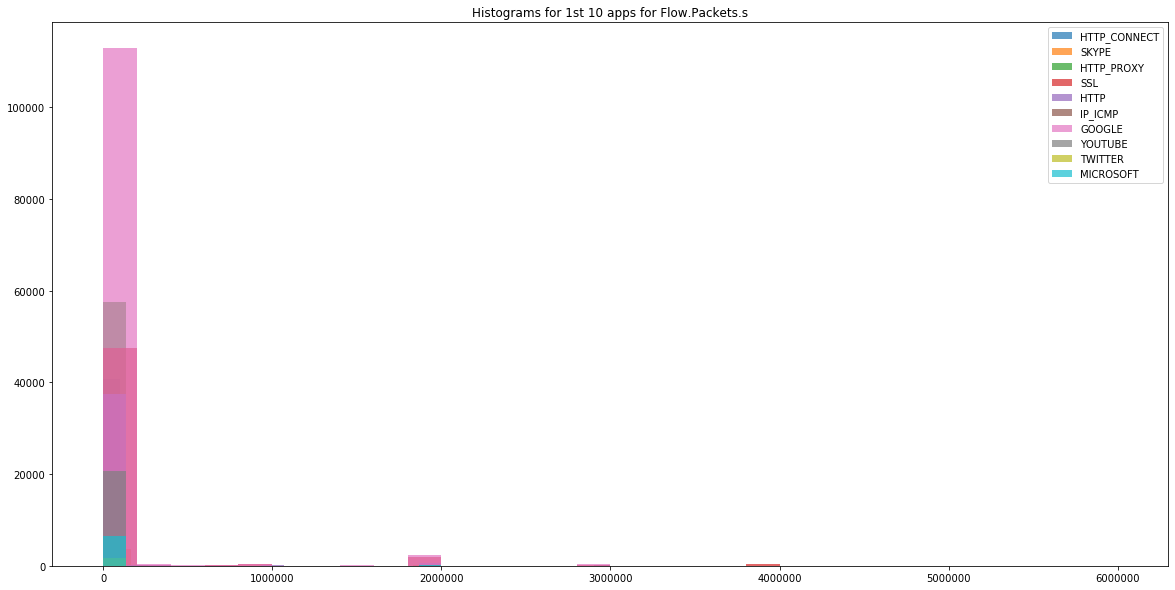

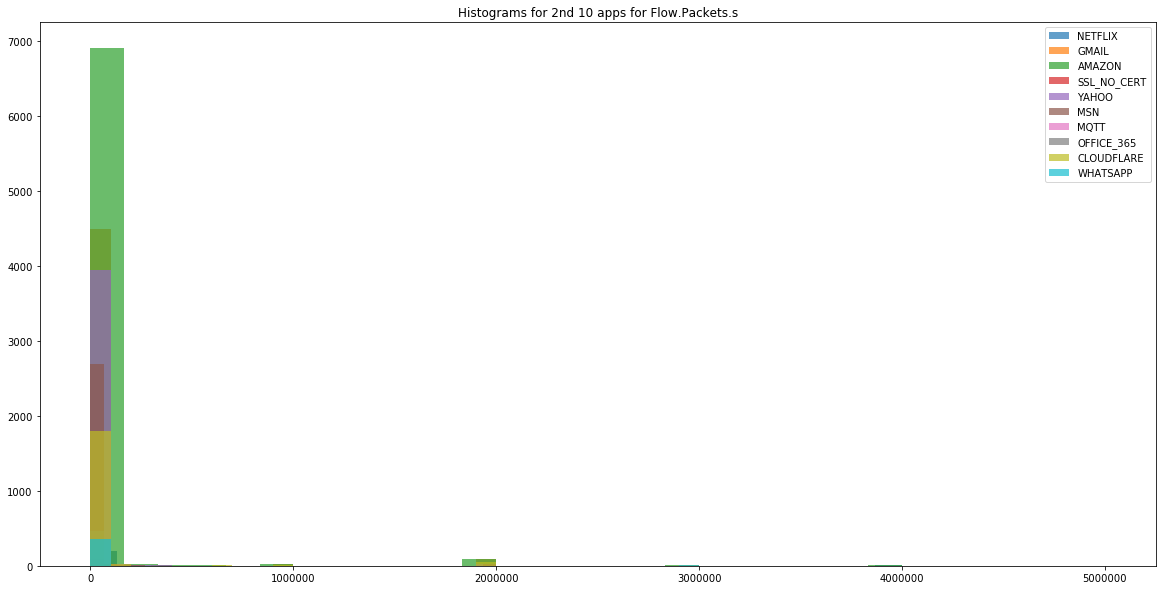

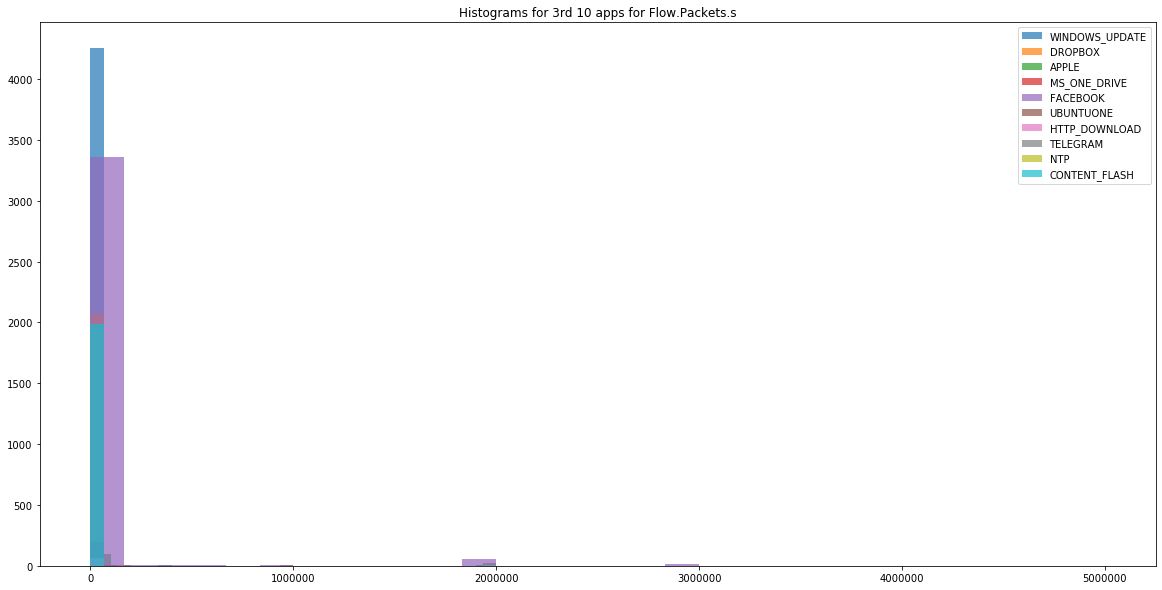

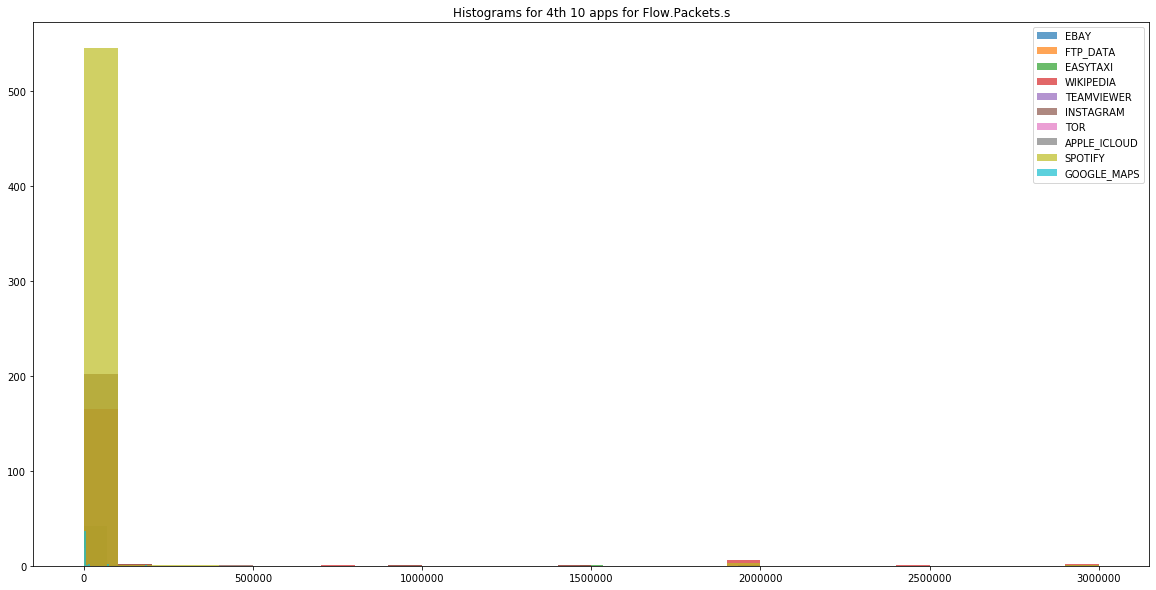

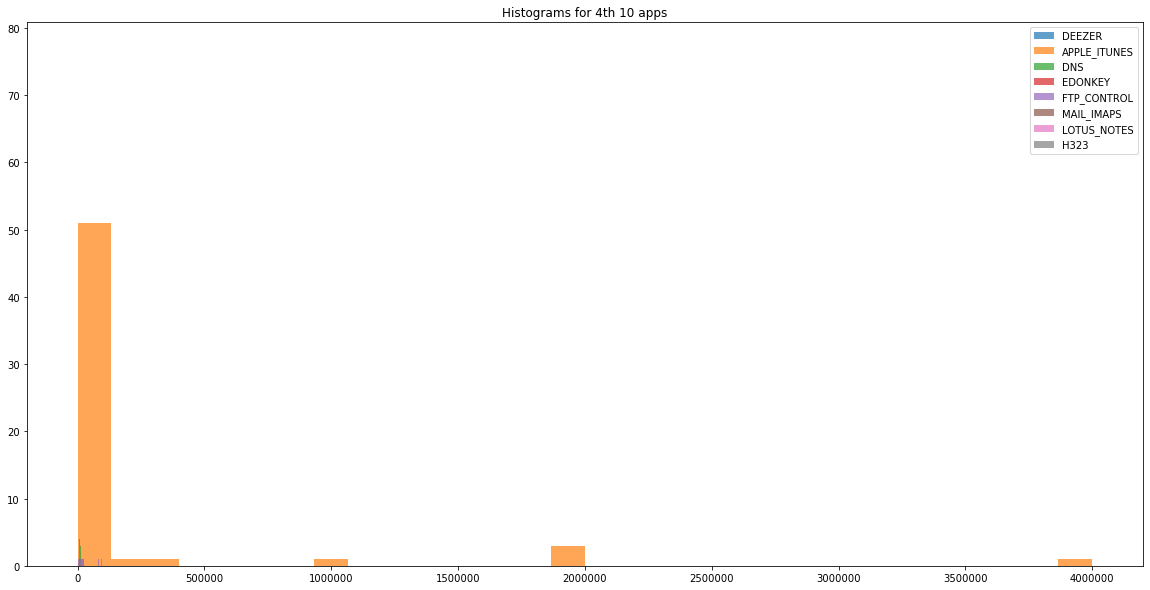

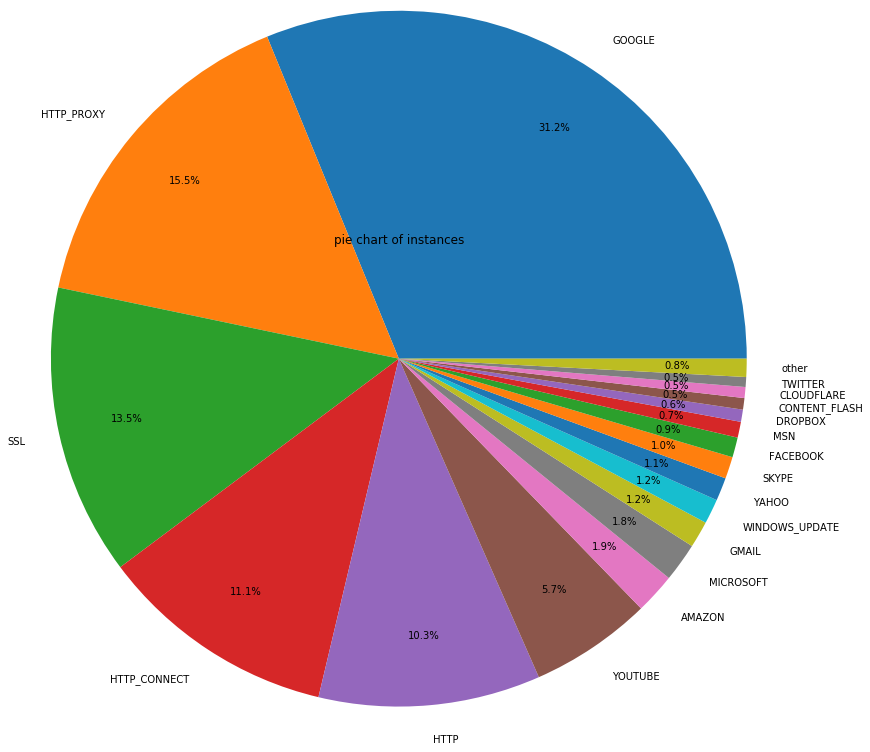

The filename is : data_9_5day.csv


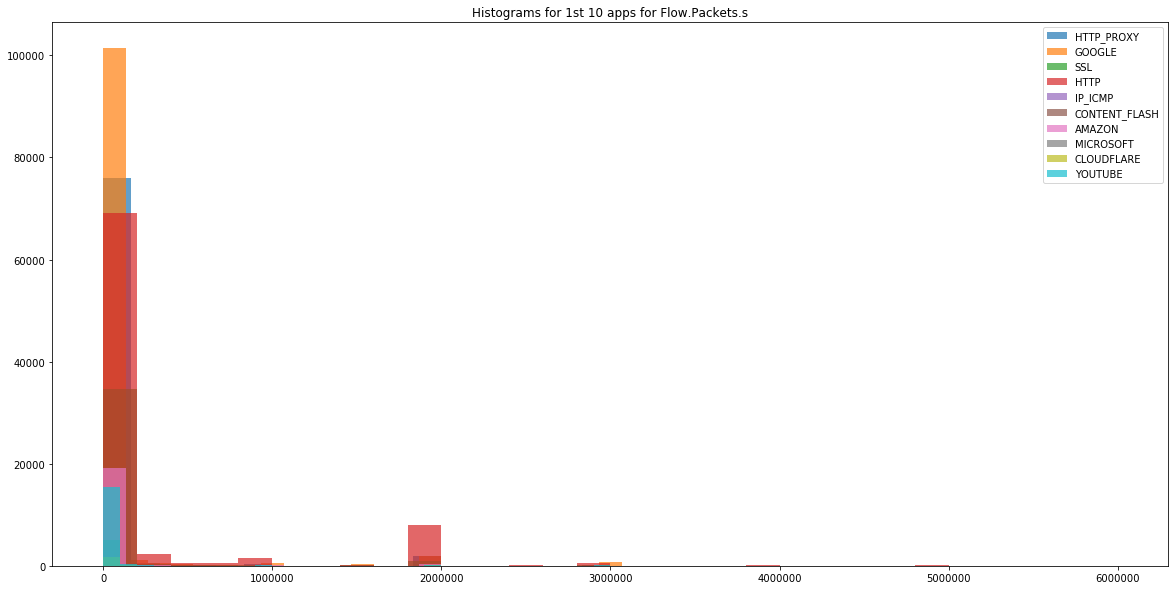

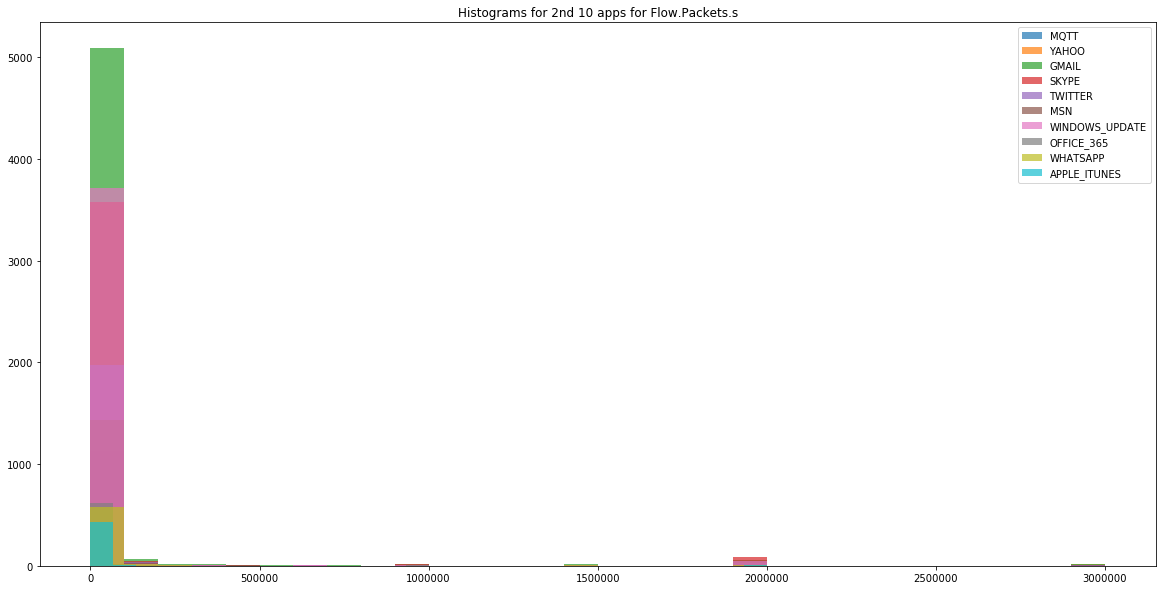

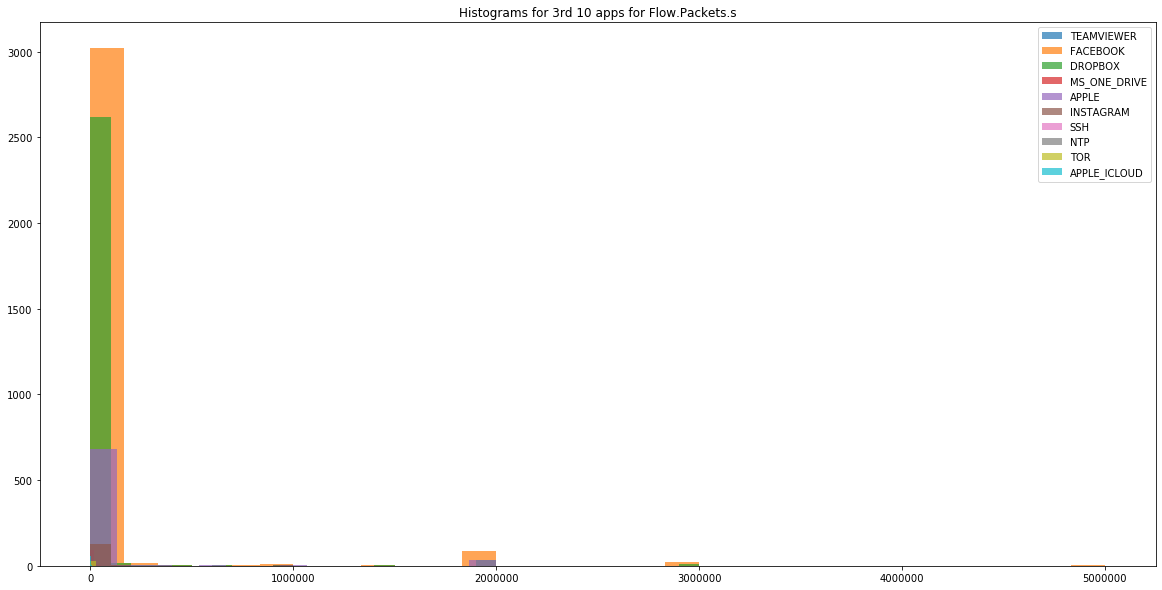

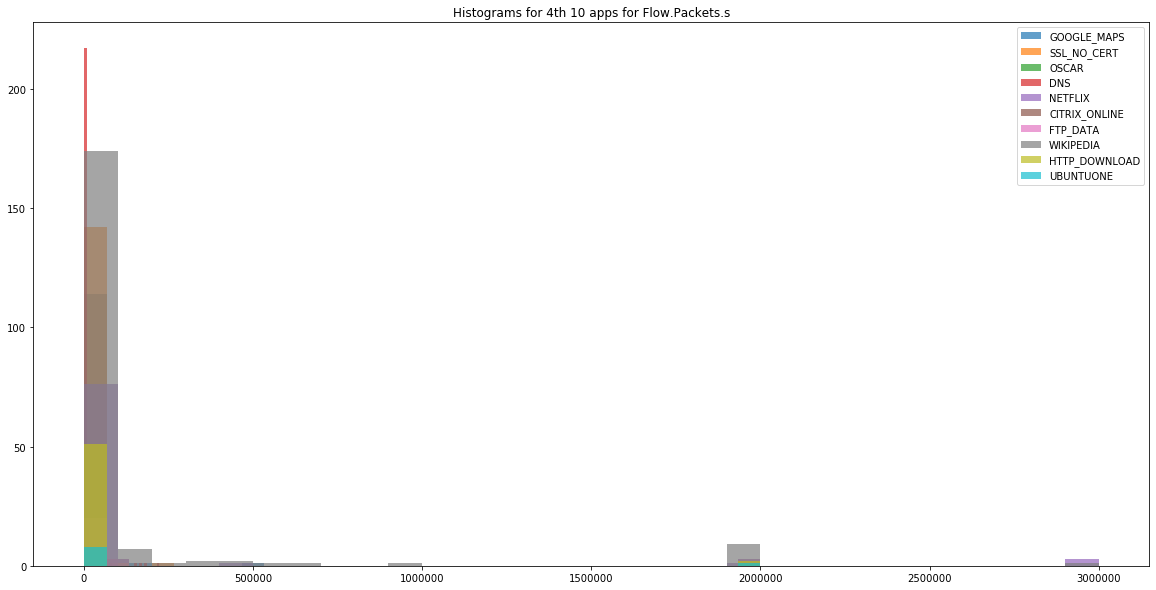

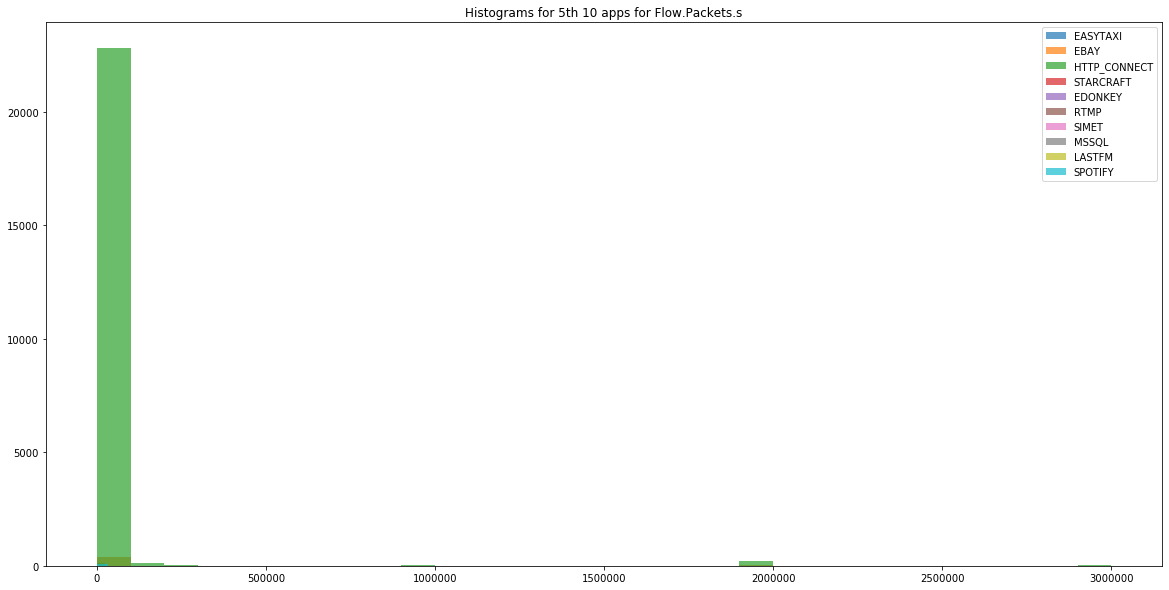

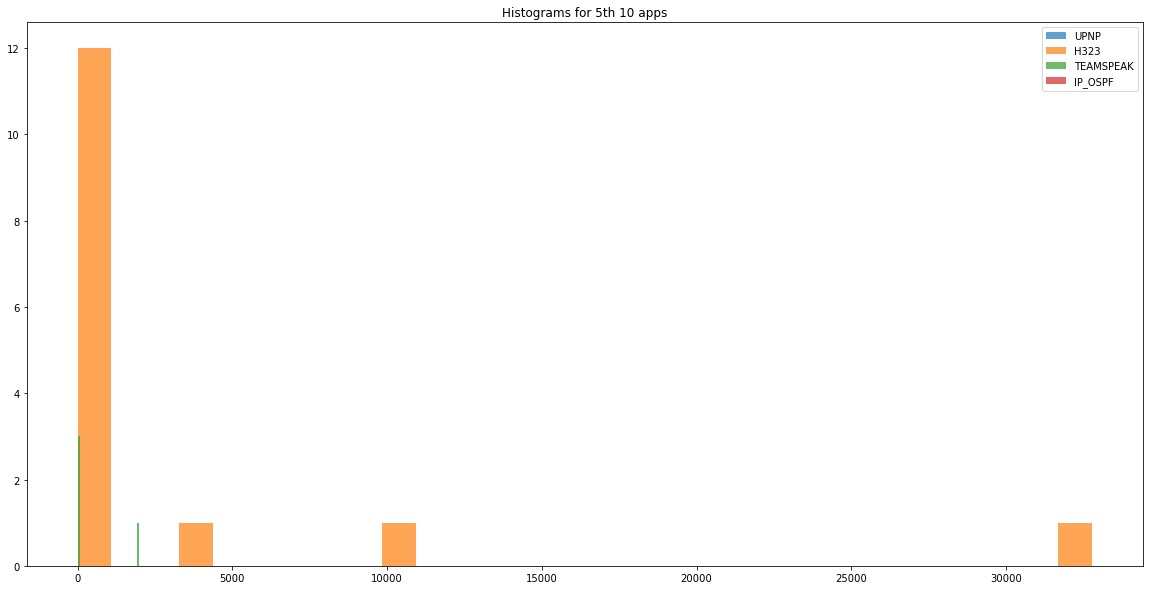

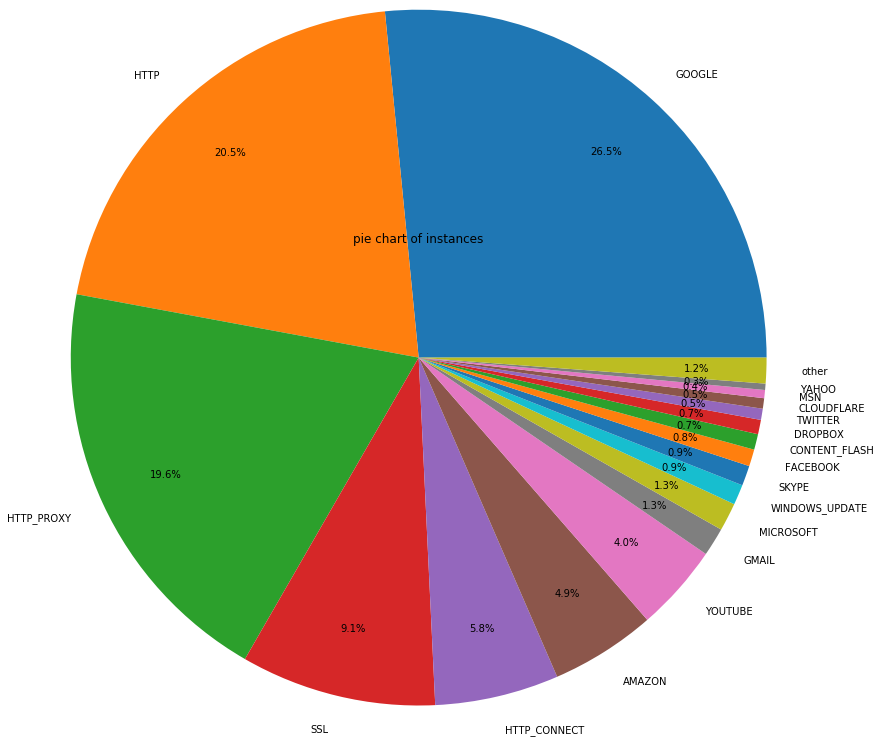

In [76]:
all_files = glob.glob("./Data" + "/*.csv")
st = { 1:'st' , 2:'nd', 3:'rd' , 4:'th' , 5:'th', 6:'th' , 7:'th' , 8:'th'}
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,error_bad_lines=False,warn_bad_lines=False)
    count=0
    plt.figure(figsize=(20,10))
    print('The filename is : '+str(filename)[7:])
    for i in df['ProtocolName'].unique():
        count+=1
        c=int(count/10)
        plt.hist((df[df['ProtocolName']==i])['Flow.Packets.s'],label=i,alpha=0.7,bins=30)
        if count%10==0:
            plt.legend()
            plt.title('Histograms for ' + str(c) + str(st[c])+' 10 apps for Flow.Packets.s')
            plt.show() 
            plt.figure(figsize=(20,10))
         
        if count>len(df['ProtocolName'].unique())-1:
            plt.legend()
            plt.title('Histograms for ' + str(c) + str(st[c])+' 10 apps')
            plt.show()
    a=df.groupby('ProtocolName')['ProtocolName'].count().sort_values(ascending=False)
    b= a.where(a>1000).dropna()
    c=a.where(a<=1000).dropna()
    other=pd.Series(sum(c),index=['other'])
    b=b.append(other)
    plt.pie(b,labels=b.index,radius=4,autopct='%1.1f%%',pctdistance=0.8)
    plt.xticks(fontsize=16)
    plt.title('pie chart of instances')
    plt.show()       
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)